# Importing Libraries

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
data=pd.read_csv(r'C:\Users\amazon\Desktop\Kayfa End Projects\reg_cars_selling.csv')

In [5]:
df=data.copy()

---

# Data Exploration

In [8]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [9]:
df.shape

(8128, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [11]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [12]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


---

# Data Cleaning

## 1] Dealing With Categorical Variables 




## name Column :

In [18]:
df['type']=df['name'].str.split(' ').str.get(0)

In [19]:
df['model']=df['name'].str.split(' ', n=1).str.get(1)

---

### mileage Column :

In [22]:
df[['mileage_value', 'unit']]=df['mileage'].str.split(' ', expand=True)

In [23]:
df['mileage_value']=df['mileage_value'].astype(float)

In [24]:
df['mileage_value'].dtype

dtype('float64')

In [25]:
cng_density = 0.71

In [26]:
df['mileage_value']=df.apply(lambda x : x['mileage_value']* cng_density if x['unit']=='km/kg' else x['mileage_value'], axis=1 )

In [27]:
df.rename(columns={'mileage_value':'mileage_value_kmpl'},inplace=True)

---

### engine Column :

In [30]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'type', 'model', 'mileage_value_kmpl', 'unit'],
      dtype='object')

In [31]:
df['engine_cc']=df['engine'].str.split(' ').str.get(0)

---

### max_powe Column

In [34]:
df['max_power_bhp']=df['max_power'].str.split(' ').str.get(0)

In [35]:
df['max_power_bhp'] = df['max_power_bhp'].str.replace(' ', '0')

In [36]:
df['max_power_bhp'] = df['max_power_bhp'].replace('', np.nan)

In [37]:
 df['max_power_bhp']= df['max_power_bhp'].astype(float)

---

### Torque column 

In [40]:
for i in df['torque'].unique():
    print(i)

190Nm@ 2000rpm
250Nm@ 1500-2500rpm
12.7@ 2,700(kgm@ rpm)
22.4 kgm at 1750-2750rpm
11.5@ 4,500(kgm@ rpm)
113.75nm@ 4000rpm
7.8@ 4,500(kgm@ rpm)
59Nm@ 2500rpm
170Nm@ 1800-2400rpm
160Nm@ 2000rpm
248Nm@ 2250rpm
78Nm@ 4500rpm
nan
84Nm@ 3500rpm
115Nm@ 3500-3600rpm
200Nm@ 1750rpm
62Nm@ 3000rpm
219.7Nm@ 1500-2750rpm
114Nm@ 3500rpm
115Nm@ 4000rpm
69Nm@ 3500rpm
172.5Nm@ 1750rpm
6.1kgm@ 3000rpm
114.7Nm@ 4000rpm
60Nm@ 3500rpm
90Nm@ 3500rpm
151Nm@ 4850rpm
104Nm@ 4000rpm
320Nm@ 1700-2700rpm
250Nm@ 1750-2500rpm
145Nm@ 4600rpm
146Nm@ 4800rpm
343Nm@ 1400-3400rpm
200Nm@ 1400-3400rpm
200Nm@ 1250-4000rpm
400Nm@ 2000-2500rpm
138Nm@ 4400rpm
360Nm@ 1200-3400rpm
200Nm@ 1200-3600rpm
380Nm@ 1750-2500rpm
173Nm@ 4000rpm
400Nm@ 1750-3000rpm
400Nm@ 1400-2800rpm
200Nm@ 1750-3000rpm
111.7Nm@ 4000rpm
219.6Nm@ 1500-2750rpm
112Nm@ 4000rpm
250Nm@ 1500-3000rpm
130Nm@ 4000rpm
205Nm@ 1750-3250rpm
280Nm@ 1350-4600rpm
99.04Nm@ 4500rpm
77Nm@ 3500rpm
110Nm@ 3750rpm
153Nm@ 3800rpm
113.7Nm@ 4000rpm
114Nm@ 4000rpm
113Nm@ 4200rpm
1

In [41]:
df['torque_value'] = df['torque'].str.extract('(\d+\.?\d*)').astype(float)

In [42]:
df['torque'] = df['torque'].astype(str)

In [43]:
df['torque_value'] = df.apply(lambda x: x['torque_value'] * 9.81 if 'kgm' in x['torque'] else x['torque_value'], axis=1)

---

## 2] Dropping redundant columns 

In [46]:
df.drop(['mileage','engine','max_power','torque','unit','name'],axis=1,inplace=True)

---

## 3] Dealing With Null Values

In [49]:
df.isna().sum()

year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
seats                 221
type                    0
model                   0
mileage_value_kmpl    221
engine_cc             221
max_power_bhp         216
torque_value          222
dtype: int64

In [50]:
from sklearn.impute import SimpleImputer 
sm=SimpleImputer(strategy='most_frequent') 
df['seats']=sm.fit_transform(df[['seats']])

In [51]:
from sklearn.impute import KNNImputer 
imp=KNNImputer ()

In [52]:
df['mileage_value_kmpl']=imp.fit_transform(df[['mileage_value_kmpl']])

In [53]:
df['engine_cc']=imp.fit_transform(df[['engine_cc']])

In [54]:
df['max_power_bhp']=imp.fit_transform(df[['max_power_bhp']])

In [55]:
df['torque_value']=imp.fit_transform(df[['torque_value']])

---

# Exploratory Data Analysis

## 1] Uni_Variant Analysis

In [59]:
df.describe(include='object')

,fuel,seller_type,transmission,owner,type,model
count,8128,8128,8128,8128,8128,8128
unique,4,3,2,5,32,2058
top,Diesel,Individual,Manual,First Owner,Maruti,Swift Dzire VDI
freq,4402,6766,7078,5289,2448,129


In [60]:
for i in df.select_dtypes('object').columns:
    print(df[i].value_counts())
    print('_' * 20)

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64
____________________
seller_type
Individual          6766
Dealer              1126
Trustmark Dealer     236
Name: count, dtype: int64
____________________
transmission
Manual       7078
Automatic    1050
Name: count, dtype: int64
____________________
owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype: int64
____________________
type
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep           

---

In [62]:
for i in df.select_dtypes('number').columns:
    print(df[i].describe().round(2))
    print('_' * 30)

count    8128.00
mean     2013.80
std         4.04
min      1983.00
25%      2011.00
50%      2015.00
75%      2017.00
max      2020.00
Name: year, dtype: float64
______________________________
count        8128.00
mean       638271.81
std        806253.40
min         29999.00
25%        254999.00
50%        450000.00
75%        675000.00
max      10000000.00
Name: selling_price, dtype: float64
______________________________
count       8128.00
mean       69819.51
std        56550.55
min            1.00
25%        35000.00
50%        60000.00
75%        98000.00
max      2360457.00
Name: km_driven, dtype: float64
______________________________
count    8128.00
mean        5.41
std         0.95
min         2.00
25%         5.00
50%         5.00
75%         5.00
max        14.00
Name: seats, dtype: float64
______________________________
count    8128.00
mean       19.35
std         3.97
min         0.00
25%        16.80
50%        19.35
75%        22.07
max        42.00
Name: mileage_val

---

## 2] Bi_Variant Analysis 




In [66]:
 df.select_dtypes('number').columns

Index(['year', 'selling_price', 'km_driven', 'seats', 'mileage_value_kmpl',
       'engine_cc', 'max_power_bhp', 'torque_value'],
      dtype='object')

<Axes: >

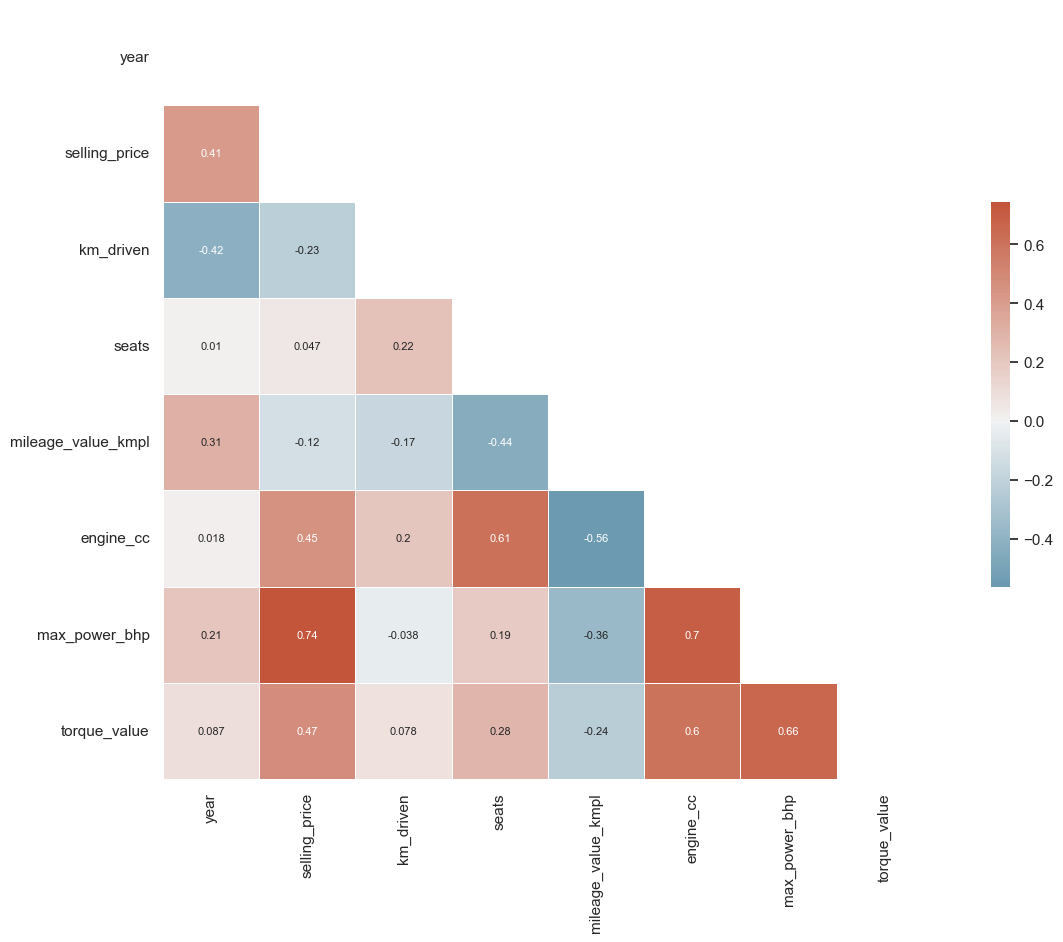

In [67]:
df_agg=df[['year', 'selling_price', 'km_driven', 'seats', 'mileage_value_kmpl',
       'engine_cc', 'max_power_bhp', 'torque_value']]
sns.set_theme(style="white")
corr = df_agg.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True) 
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, annot_kws={"fontsize":8})

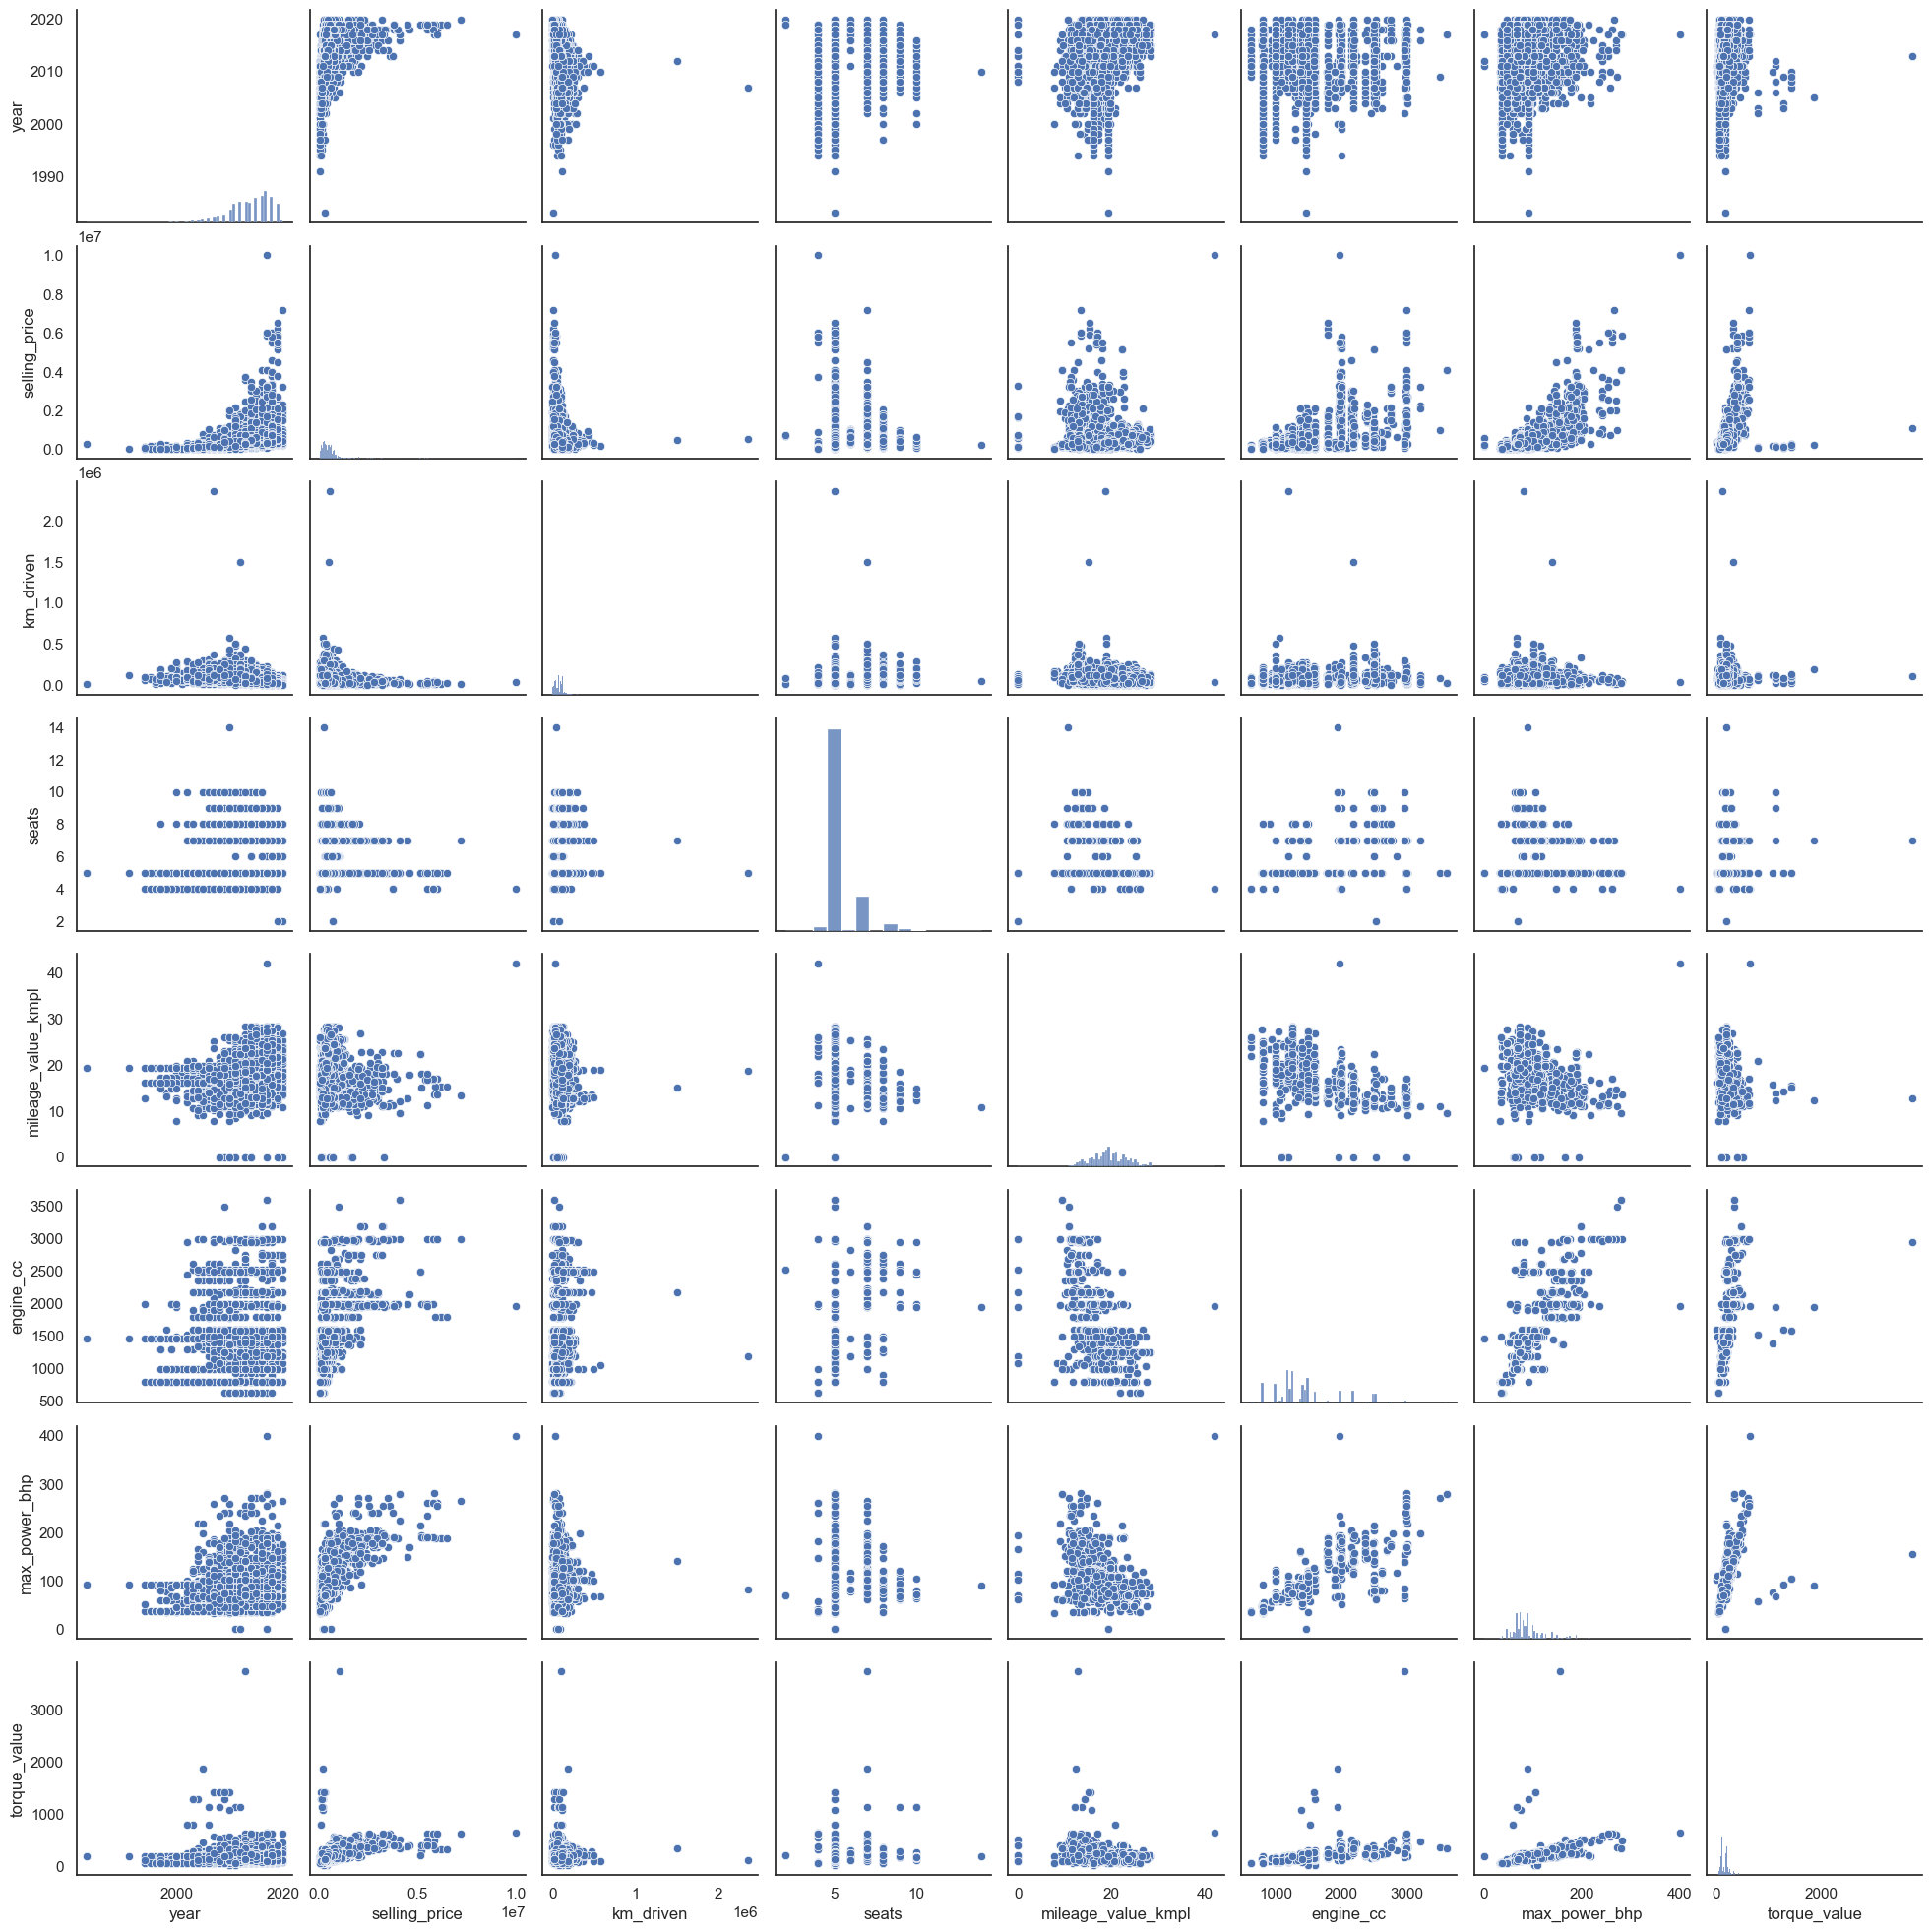

In [68]:
sns.pairplot(df[['year', 'selling_price', 'km_driven', 'seats', 'mileage_value_kmpl',
       'engine_cc', 'max_power_bhp', 'torque_value']])

In [69]:
df['selling_price'].describe().round(2)

count        8128.00
mean       638271.81
std        806253.40
min         29999.00
25%        254999.00
50%        450000.00
75%        675000.00
max      10000000.00
Name: selling_price, dtype: float64

In [70]:
def Price_binning(x):
    if x<=100000:
        return 'Economy'
    elif (x>100000)&(x<= 450000):
        return 'Budget'
    elif (x>450000)&(x<=675000):
        return 'Premium'
    else:
        return'Luxury'

In [71]:
df['price_sectors']=df['selling_price'].apply(Price_binning) # For Analysis sake

In [72]:
df.head(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,type,model,mileage_value_kmpl,engine_cc,max_power_bhp,torque_value,price_sectors
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,Swift Dzire VDI,23.40,1248.0,74.00,190.000,Budget
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda,Rapid 1.5 TDI Ambition,21.14,1498.0,103.52,250.000,Budget
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda,City 2017-2020 EXi,17.70,1497.0,78.00,124.587,Budget


## what is the average selling price by type 

In [74]:
df.groupby('type')['selling_price'].mean().round(2).to_frame()

,selling_price
type,
Ambassador,124000.00
Ashok,300000.00
Audi,2612199.92
BMW,4109916.67
Chevrolet,273867.48
Daewoo,77000.00
Datsun,314599.95
Fiat,296063.79
Force,887500.00


## what is the average selling price by year 

In [76]:
df.groupby('year')['selling_price'].mean().round(2).to_frame()

,selling_price
year,
1983,300000.00
1991,55000.00
1994,88000.00
1995,107500.00
1996,81666.67
1997,90181.73
1998,73100.00
1999,75833.33
2000,93041.55


## what is the average selling price by fuel 

In [1324]:
df.groupby('fuel')['selling_price'].mean().round(2).to_frame()

,selling_price
fuel,
CNG,301017.49
Diesel,791452.92
LPG,200421.05
Petrol,462441.06


In [132]:
df_new.index

Index(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype='object', name='fuel')

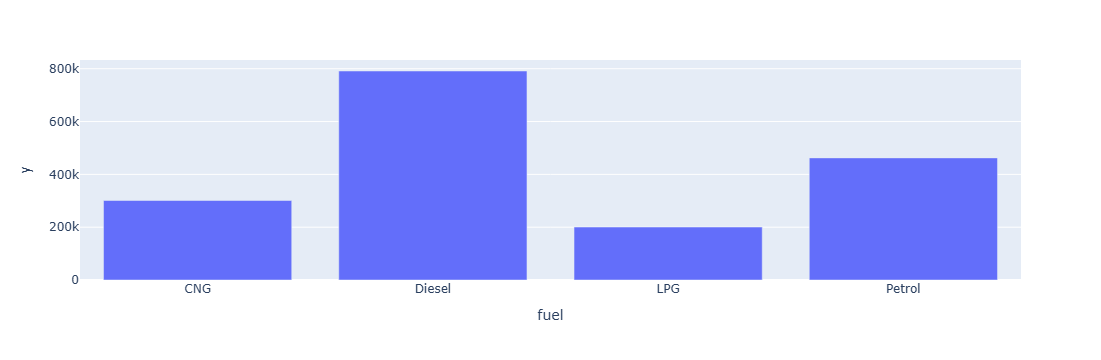

In [138]:
df_new=df.groupby('fuel')['selling_price'].mean()
px.bar(df_new,x=df_new.index,y=df_new.values)

## what is the average selling price by seller type 

In [1326]:
df.groupby('seller_type')['selling_price'].mean().round(2).to_frame()

,selling_price
seller_type,
Dealer,1443493.75
Individual,498561.23
Trustmark Dealer,801838.98


## what is the average selling price by transmission

In [1328]:
df.groupby('transmission')['selling_price'].mean().round(2).to_frame()

,selling_price
transmission,
Automatic,1870827.60
Manual,455425.86


## what is the average selling price by owner

In [1330]:
df.groupby('owner')['selling_price'].mean().round(2).to_frame()

,selling_price
owner,
First Owner,783086.41
Fourth & Above Owner,225813.17
Second Owner,392964.47
Test Drive Car,4403800.00
Third Owner,284015.33


## what are the Top 5 models by average selling price 

In [1332]:
df.groupby('owner')['selling_price'].mean().round(2).sort_values(ascending=False).head(5).to_frame()

,selling_price
owner,
Test Drive Car,4403800.00
First Owner,783086.41
Second Owner,392964.47
Third Owner,284015.33
Fourth & Above Owner,225813.17


## what is the distribution  number of seats by price sector 

In [1334]:
pd.pivot_table(df,columns='seats',index='price_sectors',values='owner',aggfunc='count')

seats,2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,14.0
price_sectors,,,,,,,,,
Budget,NaN,27.0,3355.0,28.0,251.0,106.0,31.0,11.0,1.0
Economy,NaN,96.0,273.0,NaN,2.0,3.0,NaN,2.0,NaN
Luxury,2.0,10.0,1344.0,21.0,568.0,67.0,9.0,NaN,NaN
Premium,NaN,NaN,1503.0,13.0,299.0,60.0,40.0,6.0,NaN


## what is the average torque value by price sector

In [1336]:
df.groupby('price_sectors')['torque_value'].mean().to_frame()

,torque_value
price_sectors,
Budget,147.851839
Economy,106.325356
Luxury,261.530060
Premium,175.425941


## what is the average max_power_bhp value by price sector


In [1338]:
df.groupby('price_sectors')['max_power_bhp'].mean().to_frame()

,max_power_bhp
price_sectors,
Budget,76.631126
Economy,60.984785
Luxury,126.244242
Premium,90.485769


## what is the average km_driven value by price sector

In [1340]:
df.groupby('price_sectors')['km_driven'].mean().to_frame()

,km_driven
price_sectors,
Budget,80515.597113
Economy,87392.603723
Luxury,51123.355270
Premium,64835.314420


---

## 3] Multi_Variant Analysis

In [1343]:
df.head(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,type,model,mileage_value_kmpl,engine_cc,max_power_bhp,torque_value,price_sectors
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,Swift Dzire VDI,23.40,1248.0,74.00,190.000,Budget
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda,Rapid 1.5 TDI Ambition,21.14,1498.0,103.52,250.000,Budget
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda,City 2017-2020 EXi,17.70,1497.0,78.00,124.587,Budget


## what is the average price by fuel per Year ?

In [1345]:
pd.pivot_table(df,columns='fuel',index='year',values='selling_price',aggfunc='mean').round(2)

fuel,CNG,Diesel,LPG,Petrol
year,,,,
1983,NaN,300000.00,NaN,NaN
1991,NaN,NaN,55000.00,NaN
1994,NaN,109500.00,NaN,45000.00
1995,NaN,160000.00,NaN,55000.00
1996,NaN,163000.00,NaN,41000.00
1997,NaN,108500.00,NaN,86111.00
1998,NaN,210000.00,NaN,57888.89
1999,NaN,133250.00,70000.00,58615.38
2000,80000.00,138571.43,NaN,71208.14


## what is the average price by seller_type by fuel  ? 

In [1347]:
pd.pivot_table(df,columns='fuel',index='seller_type',values='selling_price',aggfunc='mean').round(2)

fuel,CNG,Diesel,LPG,Petrol
seller_type,,,,
Dealer,NaN,1693085.20,167500.0,1031207.09
Individual,301017.49,618475.38,202250.0,359831.34
Trustmark Dealer,NaN,763235.29,NaN,808336.63


## what is the average price by transmission by Seller Type ? 

In [1349]:
pd.pivot_table(df,columns='seller_type',index='transmission',values='selling_price',aggfunc='mean').round(2)

seller_type,Dealer,Individual,Trustmark Dealer
transmission,,,
Automatic,2676082.77,1269538.60,1125595.96
Manual,595280.31,438102.06,567883.21


## what is the average price by owner by type ? 

In [1351]:
pd.pivot_table(df,columns='owner',index='type',values='selling_price',aggfunc='mean').round(2)

owner,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
type,,,,,
Ambassador,NaN,NaN,98666.67,NaN,200000.00
Ashok,NaN,NaN,300000.00,NaN,NaN
Audi,2544785.61,810000.00,1818571.43,6223000.0,1025000.00
BMW,4617303.92,480000.00,1335000.00,NaN,860000.00
Chevrolet,288500.22,248818.09,275469.09,NaN,213560.00
Daewoo,77000.00,NaN,NaN,NaN,NaN
Datsun,310280.67,NaN,357571.29,NaN,260000.00
Fiat,358400.00,NaN,205588.18,NaN,291999.80
Force,980000.00,NaN,702500.00,NaN,NaN


## what is the average price by type per year ?

In [1353]:
pd.pivot_table(df,columns='year',index='type',values='selling_price',aggfunc='mean').round(2)

year,1983,1991,1994,1995,1996,1997,1998,1999,2000,2001,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
type,,,,,,,,,,,,,,,,,,,,,
Ambassador,NaN,NaN,99000.0,NaN,NaN,NaN,NaN,NaN,75000.00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ashok,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,300000.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1300000.00,1850000.00,1659999.75,1885714.29,2366666.67,2241333.00,2484999.75,3475000.00,6223000.00,NaN
BMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1145000.00,1220833.33,2420000.00,NaN,1650000.00,2621428.57,2741666.67,4585000.00,5453125.00,7200000.00
Chevrolet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,247684.16,219666.67,276371.40,331173.91,348947.32,484199.96,558333.33,NaN,NaN,NaN
Daewoo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93000.00,45000.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Datsun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,225000.00,274999.88,286076.92,284176.41,350875.00,404999.86,400000.00
Fiat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,260999.80,301250.00,313333.33,308333.33,482727.18,328333.33,NaN,NaN,NaN,NaN
Force,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,555000.00,NaN,NaN,NaN,954000.00,NaN,NaN


In [1422]:
df.head(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,type,model,mileage_value_kmpl,engine_cc,max_power_bhp,torque_value,price_sectors
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,Swift Dzire VDI,23.40,1248.0,74.00,190.000,Budget
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,Skoda,Rapid 1.5 TDI Ambition,21.14,1498.0,103.52,250.000,Budget
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,Honda,City 2017-2020 EXi,17.70,1497.0,78.00,124.587,Budget


In [1442]:
df['model'].value_counts().sort_values(ascending=False).index[0]

'Swift Dzire VDI'

In [142]:
df.groupby('owner')['selling_price'].mean().round(2)

owner
First Owner              783086.41
Fourth & Above Owner     225813.17
Second Owner             392964.47
Test Drive Car          4403800.00
Third Owner              284015.33
Name: selling_price, dtype: float64

In [158]:
top_models = df['model'].value_counts().head(10).index

# Filter the dataframe to show rows for the top 10 most frequent models
top_models_df = df[df['model'].isin(top_models)]

# For each of the top models, select the first 1 row (or any specific number of rows)
top_models_df = top_models_df.groupby('model').head(1)
top_models_df 

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,type,model,mileage_value_kmpl,engine_cc,max_power_bhp,torque_value,price_sectors
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,Swift Dzire VDI,23.400000,1248.000000,74.000000,190.0000,Budget
26,2017,275000,28000,Petrol,Individual,Manual,First Owner,5.0,Maruti,Alto 800 LXI,24.700000,796.000000,47.300000,69.0000,Budget
46,2018,390000,10300,Petrol,Dealer,Manual,First Owner,5.0,Maruti,Alto K10 VXI,23.950000,998.000000,67.050000,90.0000,Budget
118,2017,440000,35000,Petrol,Individual,Manual,First Owner,5.0,Maruti,Wagon R VXI BS IV,20.510000,998.000000,67.040000,90.0000,Budget
119,2010,300000,120000,Diesel,Individual,Manual,Second Owner,5.0,Maruti,Swift VDI BSIV,19.347962,1458.625016,91.517919,180.7135,Budget
126,2008,105000,65000,Petrol,Individual,Manual,Fourth & Above Owner,5.0,Maruti,Alto LXi,19.700000,796.000000,46.300000,62.0000,Budget
139,2019,5800000,7500,Diesel,Dealer,Automatic,First Owner,5.0,BMW,X4 M Sport X xDrive20d,16.780000,1995.000000,190.000000,400.0000,Luxury
343,2005,89000,90000,Petrol,Individual,Manual,Second Owner,5.0,Maruti,Wagon R LXI,18.900000,998.000000,67.100000,90.0000,Economy
518,2013,180000,60000,Petrol,Individual,Manual,First Owner,5.0,Hyundai,EON Era Plus,21.100000,814.000000,55.200000,74.5000,Budget
626,2011,300000,70000,Diesel,Individual,Manual,Second Owner,5.0,Maruti,Swift VDI,22.900000,1248.000000,74.000000,190.0000,Budget


In [154]:
top_models

Index(['Swift Dzire VDI', 'Alto 800 LXI', 'Alto LXi', 'X4 M Sport X xDrive20d',
       'Swift VDI', 'Swift VDI BSIV', 'Wagon R LXI', 'Alto K10 VXI',
       'EON Era Plus', 'Wagon R VXI BS IV'],
      dtype='object', name='model')

In [144]:
df.groupby('model')['selling_price'].


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,type,model,mileage_value_kmpl,engine_cc,max_power_bhp,torque_value,price_sectors
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,Maruti,Swift Dzire VDI,23.40,1248.0,74.00,190.0,Budget
132,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,5.0,Lexus,ES 300h,22.37,2487.0,214.56,202.0,Luxury
133,2017,3200000,45000,Diesel,Dealer,Automatic,First Owner,5.0,Jaguar,XF 2.0 Diesel Portfolio,19.33,1999.0,177.00,430.0,Luxury
139,2019,5800000,7500,Diesel,Dealer,Automatic,First Owner,5.0,BMW,X4 M Sport X xDrive20d,16.78,1995.0,190.00,400.0,Luxury
151,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,5.0,Jaguar,XE 2016-2019 2.0L Diesel Prestige,13.60,1999.0,177.00,430.0,Luxury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7873,2019,5500000,8500,Diesel,Dealer,Automatic,First Owner,5.0,BMW,X4 M Sport X xDrive20d,16.78,1995.0,190.00,400.0,Luxury
7876,2018,2475000,2000,Diesel,Dealer,Automatic,First Owner,5.0,Volvo,V40 D3 R-Design,16.80,1984.0,150.00,350.0,Luxury
7878,2012,370000,68000,Diesel,Individual,Manual,First Owner,5.0,Maruti,Swift Dzire VDI,23.40,1248.0,74.00,190.0,Budget
7890,2015,600000,50000,Diesel,Individual,Manual,First Owner,5.0,Maruti,Swift Dzire VDI,26.59,1248.0,74.00,190.0,Premium


In [1418]:
df.to_csv(r'C:\Users\amazon\Desktop\Kayfa End Projects\Cars Price Prediction\car_prices-cleaned.csv')

---

# Featue Engineering

## Dealing With outliers :

In [1064]:
df.describe().round(2)

,year,selling_price,km_driven,seats,mileage_value_kmpl,engine_cc,max_power_bhp,torque_value
count,8128.00,8128.00,8128.00,8128.00,8128.00,8128.00,8128.00,8128.00
mean,2013.80,638271.81,69819.51,5.41,19.35,1458.63,91.52,180.71
std,4.04,806253.40,56550.55,0.95,3.97,497.02,35.34,114.86
min,1983.00,29999.00,1.00,2.00,0.00,624.00,0.00,14.90
25%,2011.00,254999.00,35000.00,5.00,16.80,1197.00,68.10,112.00
50%,2015.00,450000.00,60000.00,5.00,19.35,1248.00,83.10,180.00
75%,2017.00,675000.00,98000.00,5.00,22.07,1582.00,101.25,205.00
max,2020.00,10000000.00,2360457.00,14.00,42.00,3604.00,400.00,3727.80


<Axes: xlabel='selling_price', ylabel='Count'>

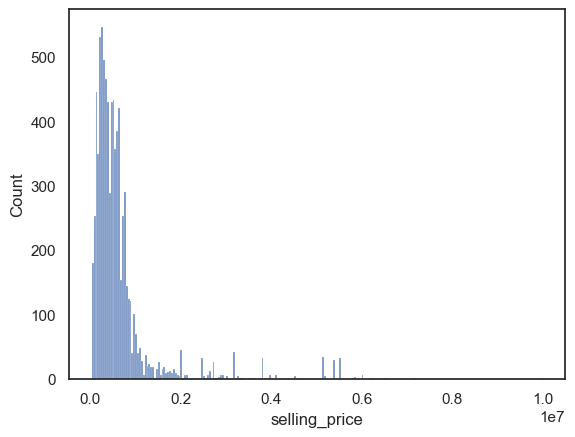

In [1065]:
sns.histplot(df['selling_price'])

In [1066]:
df.shape

(8128, 15)

In [1067]:
def extract_outliers(x):
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    iqr = q3-q1
    upper_bound = q3+(1.5*iqr)
    lower_bound = q1-(1.5*iqr)
    outlier = x[(x <= lower_bound) | (x >= upper_bound)]
    return outlier.index


outliers_selling_price = extract_outliers(df['selling_price'])
df = df.drop(outliers_selling_price)

<Axes: ylabel='km_driven'>

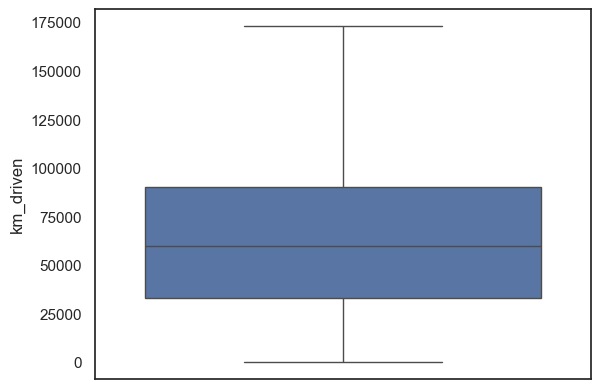

In [1171]:
sns.boxplot(df['km_driven'])

<Axes: xlabel='km_driven', ylabel='Density'>

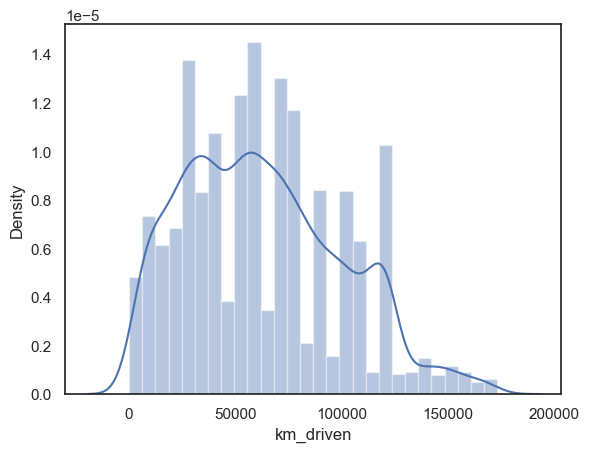

In [1175]:
sns.distplot(df['km_driven'])

In [1177]:
outliers_km_driven = extract_outliers(df['km_driven'])
df = df.drop(outliers_km_driven)

<Axes: xlabel='mileage_value_kmpl', ylabel='Count'>

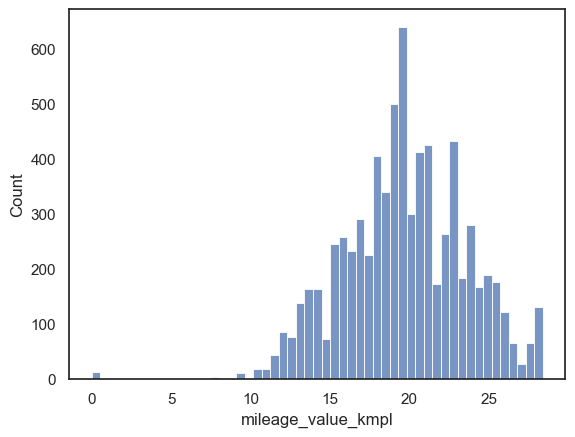

In [1071]:
sns.histplot(df['mileage_value_kmpl'])

In [1072]:
outliers_mileage_value_kmpl = extract_outliers(df['mileage_value_kmpl'])
df = df.drop(outliers_mileage_value_kmpl)

<Axes: ylabel='engine_cc'>

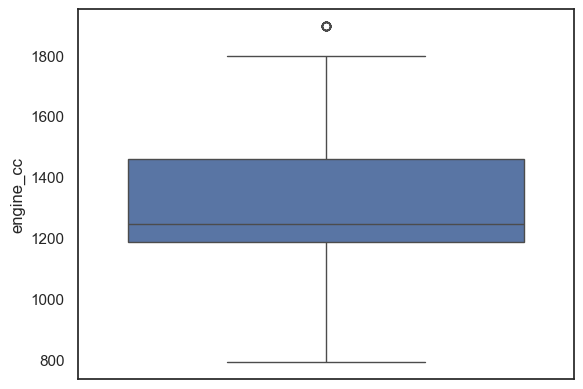

In [1151]:
sns.boxplot(df['engine_cc'])

In [1149]:
outliers_engine_cc = extract_outliers(df['engine_cc'])
df = df.drop(outliers_engine_cc)

<Axes: xlabel='max_power_bhp', ylabel='Count'>

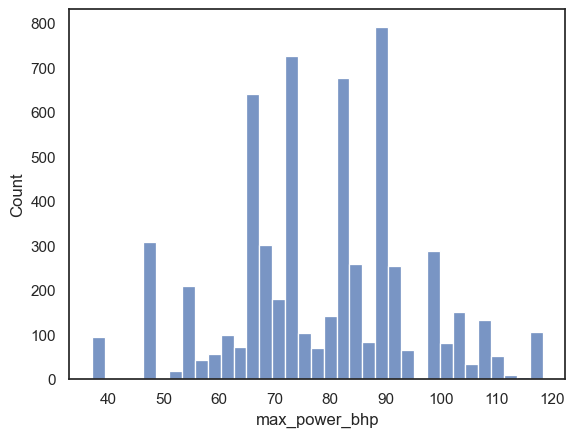

In [1157]:
sns.histplot(df['max_power_bhp'])


In [1155]:
outliers_max_power_bhp = extract_outliers(df['max_power_bhp'])
df = df.drop(outliers_max_power_bhp )

<Axes: ylabel='torque_value'>

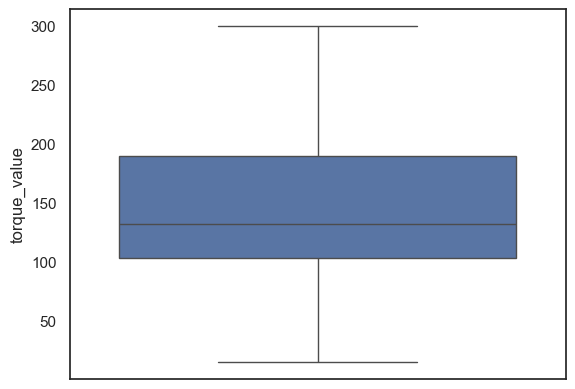

In [1161]:
sns.boxplot(df['torque_value'])

In [1159]:
outliers_torque_value = extract_outliers(df['torque_value'])
df = df.drop(outliers_torque_value )

In [1163]:
df.shape

(6033, 15)

In [1179]:
df.describe().round(2)

,year,selling_price,km_driven,seats,mileage_value_kmpl,engine_cc,max_power_bhp,torque_value
count,5971.00,5971.00,5971.00,5971.00,5971.00,5971.00,5971.00,5971.00
mean,2013.82,421539.16,62679.22,5.11,20.64,1226.74,78.46,143.17
std,4.11,232007.29,36965.51,0.51,3.23,212.83,16.42,52.51
min,1983.00,29999.00,1.00,4.00,9.37,793.00,37.00,14.90
25%,2011.00,229999.00,33033.00,5.00,18.60,1150.00,67.10,102.00
50%,2015.00,390000.00,60000.00,5.00,20.36,1199.00,80.00,132.00
75%,2017.00,600000.00,90000.00,5.00,22.98,1399.00,88.73,190.00
max,2020.00,1300000.00,173000.00,8.00,28.40,1896.00,118.35,300.00


In [672]:
df['seats'].unique()

array([5., 7., 6., 8., 4.])

## Encoding The Features

In [1181]:
df['transmission']=pd.get_dummies(df['transmission'],drop_first=True,dtype='int')

In [1183]:
owner_dic={'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5}
df['owner']=df['owner'].map(owner_dic)

In [1185]:
from sklearn.preprocessing import LabelEncoder 
lb=LabelEncoder() 

In [1187]:
df['fuel']=lb.fit_transform(df['fuel'])

In [1190]:
df['seller_type']=lb.fit_transform(df['seller_type'])

In [1192]:
df.head(3)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,type,model,mileage_value_kmpl,engine_cc,max_power_bhp,torque_value,price_sectors
0,2014,450000,145500,1,1,1,1,5.0,Maruti,Swift Dzire VDI,23.40,1248.0,74.00,190.000,Budget
1,2014,370000,120000,1,1,1,2,5.0,Skoda,Rapid 1.5 TDI Ambition,21.14,1498.0,103.52,250.000,Budget
2,2006,158000,140000,3,1,1,3,5.0,Honda,City 2017-2020 EXi,17.70,1497.0,78.00,124.587,Budget


In [1194]:
df['type_encoded']=lb.fit_transform(df['type'])
type_mapping = dict(zip(df['type'].unique(), df['type_encoded'].unique()))


In [1196]:
import joblib
category_mapping = {str(key): int(value) for key, value in type_mapping.items()}
joblib.dump(type_mapping,r"C:\Users\amazon\Desktop\Kayfa End Projects\Cars Price Prediction\type_mapping.pkl")

['C:\\Users\\amazon\\Desktop\\Kayfa End Projects\\Cars Price Prediction\\type_mapping.pkl']

In [1198]:
df['model_encoded'] = lb.fit_transform(df['model'])
category_mapping = dict(zip(df['model'].unique(), df['model_encoded'].unique()))

import joblib
category_mapping = {str(key): int(value) for key, value in category_mapping.items()}
joblib.dump(category_mapping,r"C:\Users\amazon\Desktop\Kayfa End Projects\Cars Price Prediction\model_mapping.pkl")

['C:\\Users\\amazon\\Desktop\\Kayfa End Projects\\Cars Price Prediction\\model_mapping.pkl']

In [1200]:
df

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,type,model,mileage_value_kmpl,engine_cc,max_power_bhp,torque_value,price_sectors,type_encoded,model_encoded
0,2014,450000,145500,1,1,1,1,5.0,Maruti,Swift Dzire VDI,23.40,1248.0,74.00,190.000,Budget,10,1052
1,2014,370000,120000,1,1,1,2,5.0,Skoda,Rapid 1.5 TDI Ambition,21.14,1498.0,103.52,250.000,Budget,15,883
2,2006,158000,140000,3,1,1,3,5.0,Honda,City 2017-2020 EXi,17.70,1497.0,78.00,124.587,Budget,6,230
3,2010,225000,127000,1,1,1,1,5.0,Hyundai,i20 Sportz Diesel,23.00,1396.0,90.00,219.744,Budget,7,1420
4,2007,130000,120000,3,1,1,1,5.0,Maruti,Swift VXI BSIII,16.10,1298.0,88.20,112.815,Budget,10,1094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,320000,110000,3,1,1,1,5.0,Hyundai,i20 Magna,18.50,1197.0,82.85,113.700,Budget,7,1410
8124,2007,135000,119000,1,1,1,4,5.0,Hyundai,Verna CRDi SX,16.80,1493.0,110.00,235.440,Budget,7,1206
8125,2009,382000,120000,1,1,1,1,5.0,Maruti,Swift Dzire ZDi,19.30,1248.0,73.90,190.000,Budget,10,1064
8126,2013,290000,25000,1,1,1,1,5.0,Tata,Indigo CR4,23.57,1396.0,70.00,140.000,Budget,16,654


---- 


## Splitting The Data 

In [1202]:
x=df.drop(['selling_price','model','type','price_sectors'],axis=1)
y=df['selling_price']

In [1206]:
x

,year,km_driven,fuel,seller_type,transmission,owner,seats,mileage_value_kmpl,engine_cc,max_power_bhp,torque_value,type_encoded,model_encoded
0,2014,145500,1,1,1,1,5.0,23.40,1248.0,74.00,190.000,10,1052
1,2014,120000,1,1,1,2,5.0,21.14,1498.0,103.52,250.000,15,883
2,2006,140000,3,1,1,3,5.0,17.70,1497.0,78.00,124.587,6,230
3,2010,127000,1,1,1,1,5.0,23.00,1396.0,90.00,219.744,7,1420
4,2007,120000,3,1,1,1,5.0,16.10,1298.0,88.20,112.815,10,1094
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,2013,110000,3,1,1,1,5.0,18.50,1197.0,82.85,113.700,7,1410
8124,2007,119000,1,1,1,4,5.0,16.80,1493.0,110.00,235.440,7,1206
8125,2009,120000,1,1,1,1,5.0,19.30,1248.0,73.90,190.000,10,1064
8126,2013,25000,1,1,1,1,5.0,23.57,1396.0,70.00,140.000,16,654


In [1208]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

---

## Scaling The Data

In [1218]:
from sklearn.preprocessing import StandardScaler 
input_encoder=StandardScaler()
target_encoder=StandardScaler()

In [1220]:
x_scaled=input_encoder.fit_transform(x_train)

In [1222]:
y_scaled=target_encoder.fit_transform(y_train.values.reshape(-1,1))

In [1224]:
import joblib 
joblib.dump(input_encoder,r'C:\Users\amazon\Desktop\Kayfa End Projects\Cars Price Prediction\x_scaled.pkl')


['C:\\Users\\amazon\\Desktop\\Kayfa End Projects\\Cars Price Prediction\\x_scaled.pkl']

In [1226]:
joblib.dump(target_encoder,r'C:\Users\amazon\Desktop\Kayfa End Projects\Cars Price Prediction\y_scaled.pkl')


['C:\\Users\\amazon\\Desktop\\Kayfa End Projects\\Cars Price Prediction\\y_scaled.pkl']

---

# Building The Model

In [1228]:
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [1230]:
lr=LinearRegression() 
svr=SVR() 
rf=RandomForestRegressor () 
xg=XGBRegressor() 
kn=KNeighborsRegressor()

In [688]:
param1 = {}
param1['regressor'] = [lr]

param2 = {}
param2['regressor__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['regressor'] = [svr]

param3 = {}
param3['regressor__n_estimators'] = [50, 100, 200, 500]
param3['regressor__max_depth'] = [5, 10, 20]
param3['regressor'] = [rf]

param4 = {}
param4['regressor__booster'] = ['gbtree', 'gblinear', 'dart']
param4['regressor__n_estimators'] = [50, 100, 200, 500]
param4['regressor__max_depth'] = [5, 10, 20]
param4['regressor'] = [xg]

param5={}
param5['regressor__n_neighbors']=[3,5,7]
param5['regressor__weights']=['uniform', 'distance']
param5['regressor__algorithm']=['auto','ball_tree','kd_tree','brute']
param5['regressor']=[kn]

pipeline = Pipeline([('regressor', lr)])
params = [param1, param2, param3,param4,param5]

gs = GridSearchCV(pipeline, params, cv=3, scoring='') 

gs.fit(x_scaled, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('regressor', LinearRegression())]),
             param_grid=[{'regressor': [LinearRegression()]},
                         {'regressor': [SVR()],
                          'regressor__C': [0.01, 0.1, 1, 10, 100]},
                         {'regressor': [RandomForestRegressor()],
                          'regressor__max_depth': [5, 10, 20],
                          'regressor__n_estimators': [50, 100, 200, 500]},
                         {'regressor': [XGBRegressor(base_score=None,
                                                     booster=...
                                                     num_parallel_tree=None,
                                                     random_state=None, ...)],
                          'regressor__booster': ['gbtree', 'gblinear', 'dart'],
                          'regressor__max_depth': [5, 10, 20],
                          'regressor__n_estimators': [50, 100, 200, 500]},
                         {'regressor': [KNeighborsRegressor()],
                          'regressor__algorithm': ['auto', 'ball_tree',
                                                   'kd_tree', 'brute'],
                          'regressor__n_neighbors': [3, 5, 7],
                          'regressor__weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [690]:
gs.best_estimator_

Pipeline(steps=[('regressor', LinearRegression())])

In [692]:
gs.best_params_

{'regressor': LinearRegression()}

In [694]:
gs.best_score_

nan

In [696]:
model=gs.best_estimator_

In [706]:
preds=model.predict(x_test_scaled)

In [708]:
r2_score(preds,y_test)

0.5550529062610092

---

In [710]:
xg.fit(x_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [712]:
predict=xg.predict(x_test_scaled)

In [714]:
r2_score(predict,y_test)

0.906834390102108

## looping the models 

In [1232]:
models={'lr':LinearRegression(), 
'svr':SVR(), 
'rf':RandomForestRegressor(), 
'xg':XGBRegressor(), 
'kn':KNeighborsRegressor()}

In [1234]:
for name,model in models.items():
    print(f'used Model : {name}')
    model.fit(x_scaled, y_train)
    print(f'Training Score is: {model.score(x_scaled, y_train)}')
    print(f'Testing Score is: {model.score(x_test_scaled, y_test)}')
    y_preds=model.predict(x_test_scaled)
    print(f'MSE:{np.sqrt(mean_squared_error(y_preds,y_test))}')
    print('_'*50)

used Model : lr
Training Score is: 0.7395693901296863
Testing Score is: 0.7493069329889177
MSE:118279.64768853367
__________________________________________________
used Model : svr
Training Score is: -0.015797267232230405
Testing Score is: -0.021492756030673243
MSE:238757.21590576734
__________________________________________________
used Model : rf
Training Score is: 0.9880247617929891
Testing Score is: 0.8975353029875368
MSE:75618.13997475455
__________________________________________________
used Model : xg
Training Score is: 0.9803661394329899
Testing Score is: 0.8403949158660485
MSE:94376.14228896309
__________________________________________________
used Model : kn
Training Score is: 0.9124687821206623
Testing Score is: 0.8615129773034161
MSE:87911.03633426203
__________________________________________________


## Saving the best model

In [1236]:
kn_model=kn.fit(x_scaled, y_train)

In [1238]:
y_preds=kn.predict(x_test_scaled)
r2_score(y_test,y_preds)

0.8615129773034161

In [1240]:
import joblib
joblib.dump(kn_model,r'C:\Users\amazon\Desktop\Kayfa End Projects\Cars Price Prediction\kn_model.pkl')

['C:\\Users\\amazon\\Desktop\\Kayfa End Projects\\Cars Price Prediction\\kn_model.pkl']

In [1244]:
kn.predict([2010,10000,'Diesel','individual','Manual','First Owner',4,'Volkswagen','Wagon R LXI Minor'])

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (4071626263.py, line 1)

---